In [58]:
#Install packages
%pip install pandas
%pip matplotlib

#Import pandas library'
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "matplotlib"



In [59]:
# 1. Load the dataset
cities_df = pd.read_csv('country_subset-1.csv', header=0, names=['Name', 'Continent', 'Population'])
print(cities_df.head(5))


             Name Continent  Population
0     Afghanistan      Asia  22720000.0
1         Albania    Europe   3401200.0
2         Algeria    Africa  31471000.0
3  American Samoa   Oceania     68000.0
4         Andorra    Europe     78000.0


In [60]:
# 2. Data Cleaning

# Calculate the median population for each continent
continent_population_median = cities_df.groupby('Continent')['Population'].median()

# Fill missing population values with the mean population
cities_df['Population'].fillna(cities_df['Continent'].map(continent_population_median) , inplace=True)
cities_df['Population'] = cities_df['Population'].astype(int)

#display the df
print(cities_df)


               Name Continent  Population
0       Afghanistan      Asia    22720000
1           Albania    Europe     3401200
2           Algeria    Africa    31471000
3    American Samoa   Oceania       68000
4           Andorra    Europe       78000
..              ...       ...         ...
234  Western Sahara    Africa      293000
235           Yemen      Asia    18112000
236      Yugoslavia    Europe    10640000
237          Zambia    Africa     9169000
238        Zimbabwe    Africa    11669000

[239 rows x 3 columns]


C:\Users\chori\AppData\Local\Temp\ipykernel_3036\989893406.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cities_df['Population'].fillna(cities_df['Continent'].map(continent_population_median) , inplace=True)


In [61]:
# 3. Exploratory Data Analysis

# Count and then print the number of countries in each continent
continent_country_count = cities_df.groupby('Continent').size()
print(continent_country_count)

# Find the most and least populous countries
most_populous_country = cities_df.loc[cities_df['Population'].idxmax()]
least_populous_country = cities_df.loc[cities_df['Population'].idxmin()]

# Print the most and least populous countries
print("Most populous country:")
print(most_populous_country)
print("\nLeast populous country:")
print(least_populous_country)

# Calculate the total and average population of each continent
total_population_continent = cities_df.groupby('Continent')['Population'].sum()
total_avg_contitent_population = cities_df.groupby('Continent')['Population'].mean()

# Print the total and average population of each continent
print("\nTotal population by continent:")
print(total_population_continent)
print("\nAverage population by continent:")
print(total_avg_contitent_population)

# Identify continents with above-average total population
average_population = cities_df['Population'].mean()
above_average_continents = total_population_continent[total_population_continent > average_population]

# Print continents with above-average total population
print("\nContinents with above-average total population:")
print(above_average_continents)

Continent
Africa           58
Antarctica        5
Asia             51
Europe           46
North America    37
Oceania          28
South America    14
dtype: int64
Most populous country:
Name               China
Continent           Asia
Population    1277558000
Name: 44, dtype: object

Least populous country:
Name          Antarctica
Continent     Antarctica
Population             0
Name: 7, dtype: object

Total population by continent:
Continent
Africa            791905000
Antarctica                0
Asia             3705025700
Europe            730074600
North America     482993000
Oceania            30401150
South America     345780000
Name: Population, dtype: int64

Average population by continent:
Continent
Africa           1.365353e+07
Antarctica       0.000000e+00
Asia             7.264756e+07
Europe           1.587119e+07
North America    1.305386e+07
Oceania          1.085755e+06
South America    2.469857e+07
Name: Population, dtype: float64

Continents with above-average total

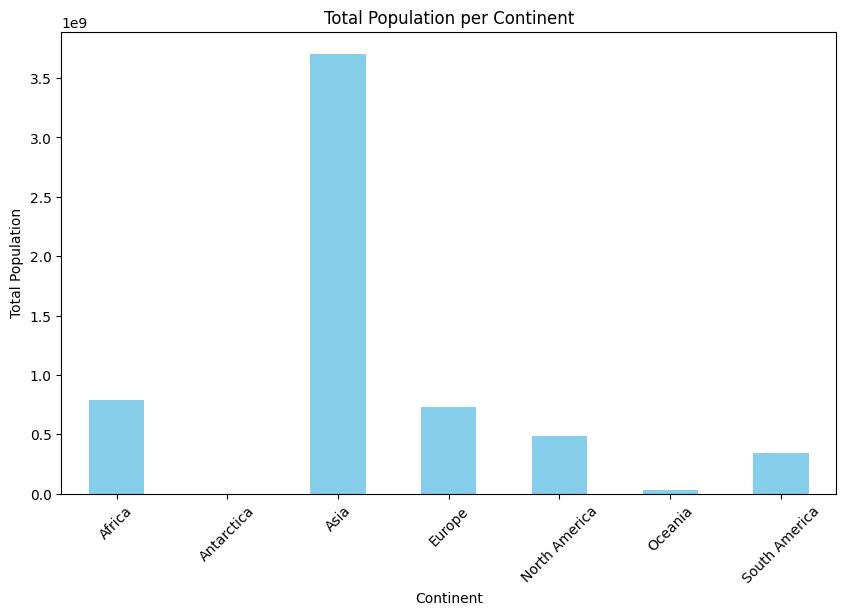

In [62]:
# 4. Data Visualization

# Create a bar chart of total population per continent
total_population_continent.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Population per Continent')
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.show()

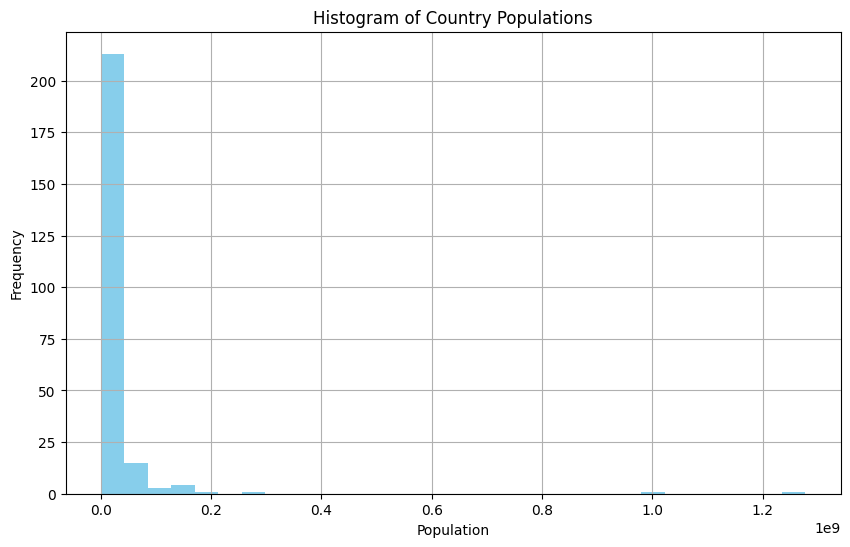

In [63]:
# Create a histogram of country populations
cities_df['Population'].hist(bins=30, figsize=(10, 6), color='skyblue')
plt.title('Histogram of Country Populations')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()